## Importe de librerias:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parte 0:  Generacion de la data y exploracion de la misma:

Dado que la dimension del vector X es mayor a 2, no es posible graficarlo de manera convencional, por ende un analisis exploratorio visual no es posible.

In [2]:
d = 100 #cantidad de columnas para el dataset.
n = 1000 #cantidad de observaciones para el dataset.
X = np.random.normal(0,1, size=(n,d)) #media cero y desviacion estandard de 1. Generando valore aleatorios normales.
beta_true = np.random.normal(0,1, size=(d,1)) #Generando valores aleatorios para las betas 
y = X.dot(beta_true) + np.random.normal(0,0.5,size=(n,1))

La correlacion entre los datos debe funcionar porque el ruido que se le esta inyectando a la varibale "y" tiene valores generados con una desviacion estandar menor (0.5) y se crearon en base a los valores generados de la variable x.

El objetivo del laboratorio sera aplicar el algoritmo de Gradient Descent, es decir, seguir los siguientes lineamientos:


![alt text](img01.png "Algoritmo de Gradient descent")

Tenemos la siguiente funcion objetivo:

![alt text](img02.png "Funcion objetivo")

Y el problema de minimizacion:

![alt text](img03.png "Problema de minimizacion")

Por lo que el gradiente viene dado de la siguiente forma:

![alt text](img04.png "Gradiente")


# Parte 1: Solucion cerrada

Se basa en la siguiente formula: 

![alt text](img05.png "Forma cerrada")

In [3]:
beta_ast = np.matmul(np.matmul(X.transpose(),X),np.matmul(X.transpose(),y))

### Conclusiones y justificaciones:

## Parte 2: Solucion GD.

Como criterio para evaluar el performance del algoritmos se tomará el MSE entre la Y real y la Y producida por el algoritmo. Se graficará el error vs la cantidad de iteraciones. 

Para detener el algoritmo tambien se tomara en cuenta este error (MSE), se creara una lista que vaya recopilando este error en cada iteracion y si el promedio de los ultimos 5 valores de esta lista, es mayor o igual que el promedio del grupo anterior de 5, se detendra el algoritmo, indicando de que o la convergencia se ha alcanzado,  o que los valores de beta son los mas optimos.

El mejor learning rate sera el que devuelva un menor error en una menor cantidad de iteraciones.

In [4]:
learningRates = [0.00005, 0.0005, 0.0007]
#Inicializando beta como un vector nulo
beta_true = np.zeros_like(beta_true)

Definimos algunas fucniones:

In [5]:
def generalGD(lr,X,Y,beta):
    firstProduct = np.matmul(X,beta)-Y #Vector 1000x1
    secondPoduct = np.matmul(X.transpose(), firstProduct)
    gradiente = np.mean(secondPoduct)
    #beta = beta-lr*gradient(beta,X,Y)
    beta = beta-lr*gradiente
    return beta

In [6]:
def testPerformanceGD(beta=beta_true,X = X, Y = y, lr = learningRates[0]):
    '''
    input: La funcion toma como paremtros los valores el vector X, Y, el step size y los parametros entrenables beta
    output: Devuelve una tupla de tamaño 3. El primer valor es una lista con los valores de la funcion evaluada en
            cada  iteracion, el segundo valor es una lista con el error cuadrado medio (similar a la funcion objetivo)
            de cada iteracion, y el tercer valor es la última iteración antes de alcanzar la convergencia.
    '''
    errorList = []
    funcionObjList = []
    epoch = 0
    MSE = 0
    while True:
        epoch += 1
        Y_hat = np.matmul(X,beta)
        MSE = np.mean(np.power((Y-Y_hat),2))
        beta = generalGD(lr,X,Y,beta)
        funcionObj = np.sum(np.power((np.matmul(X,beta) - Y),2))
        funcionObjList.append(funcionObj)
        errorList.append(MSE)
        if ( np.mean(errorList[-5:]) >= np.mean(errorList[-10:-5]) ):
            break
    return (funcionObjList, errorList, epoch)

In [7]:
performance = []
for learingR in learningRates:
    performance.append(testPerformanceGD(lr = learingR))

/Users/FranciscoMorales/anaconda3/envs/tensor_flow_cpu/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/FranciscoMorales/anaconda3/envs/tensor_flow_cpu/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Graficas y conclusion del mejor learning rate.

Obtenemos las siguientes graficas de la funcion para las primeras 20 iteraciones del algoritmo:

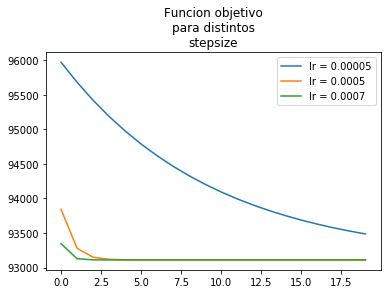

In [8]:
plt.plot(performance[0][0][:20], label='lr = 0.00005')
plt.plot(performance[1][0][:20], label='lr = 0.0005')
plt.plot(performance[2][0][:20], label='lr = 0.0007')
plt.title('Funcion objetivo\npara distintos\nstepsize')
plt.legend(loc = 'best')
plt.show()

### Experimento Bonus:

Vemos que los learning rates con mejores resultas son los ultimos dos (0.0005 y 0.0007) sin embargo, para obtener un resultado mas concluyente, a verificar el performance de cada learning rate hasta su convergencia. Para ello vemos la ultima iteracion necesaria para alcanzar la convergencia y el MSE al que se llegó.

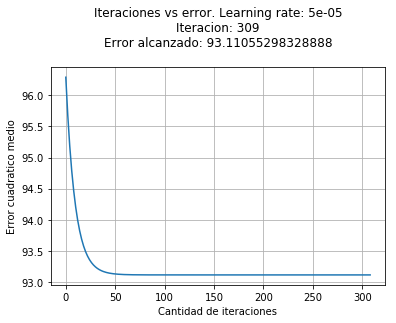

In [9]:
fig, ax = plt.subplots()
ax.plot(np.arange(0,len(performance[0][1])), performance[0][1])
ax.set(xlabel='Cantidad de iteraciones', 
       ylabel='Error cuadratico medio',
       title='Iteraciones vs error. Learning rate: '+str(learningRates[0])
       +'\nIteracion: '+str(performance[0][2])
       +'\nError alcanzado: '+str( performance[0][1][-1])+'\n')
ax.grid()
plt.show()

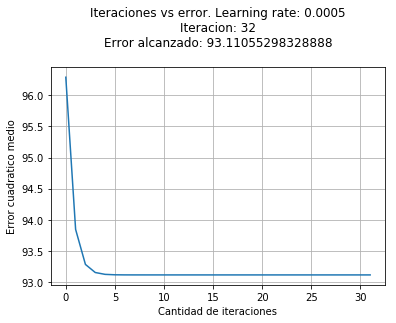

In [10]:
fig, ax = plt.subplots()
ax.plot(np.arange(0,len(performance[1][1])), performance[1][1])
ax.set(xlabel='Cantidad de iteraciones', 
       ylabel='Error cuadratico medio',
       title='Iteraciones vs error. Learning rate: '+str(learningRates[1])
       +'\nIteracion: '+str(performance[1][2])
       +'\nError alcanzado: '+str( performance[1][1][-1])+'\n')
ax.grid()
plt.show()

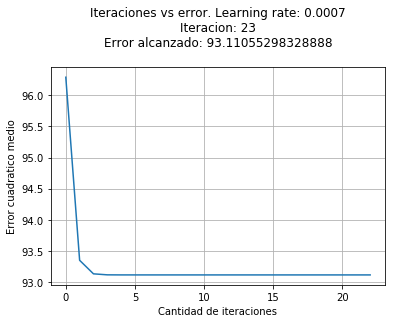

In [11]:
fig, ax = plt.subplots()
ax.plot(np.arange(0,len(performance[2][1])), performance[2][1])
ax.set(xlabel='Cantidad de iteraciones', 
       ylabel='Error cuadratico medio',
       title='Iteraciones vs error. Learning rate: '+str(learningRates[2])
       +'\nIteracion: '+str(performance[2][2])
       +'\nError alcanzado: '+str( performance[2][1][-1])+'\n')
ax.grid()
plt.show()

Con estos últimos resultados podemos decir que el learning rate de 0.0007 alcanza la convergencia de maner más rápida. Lo cual tiene sentido ya que los "steps" son mas largos.

En cuanto al valor de convergencia del MSE al que llegan, es prácticamente el mismo para los tres.

**El step size afecta el algoritmo, en la rapidez con la que converge a la solucion.**

# Parte 3: SGD. 

Iniciamos realizando un shuffle a la data:

In [12]:
#Reordenamos la data, para no perder la correspondencia de los valores de X y Y, unimos los dos vectores:
allData = np.append(X,y,axis=1)

In [13]:
#los tamaños de los vectores resultantes son consistentes:
print(allData.shape)
print(X.shape)
print(y.shape)

(1000, 101)
(1000, 100)
(1000, 1)


In [14]:
#Aplicando random.shufle a la data:
np.random.shuffle(allData)

In [15]:
#Ahora procedemos a separar nuevamente los vectores X y Y nuevamente.
xShuffle = allData.transpose()[:100].transpose()
yShuffle = allData.transpose()[-1].transpose()
yShuffle = np.reshape(yShuffle,(n,1))

In [16]:
#Validamos que la forma de las matrices no haya cambiado:
xShuffle.shape

(1000, 100)

In [17]:
yShuffle.shape

(1000, 1)

Ahora procedemos con el algoritmo en si:

In [18]:
#Inicializando beta como un vector nulo
beta_true = np.zeros_like(beta_true)

In [19]:
def testPerformanceSGD(beta=beta_true,X = xShuffle, Y = yShuffle, lr = learningRates[0],epochs = 1):
    '''
    input: La funcion toma como paremtros los valores el vector X, Y, el step size y los parametros entrenables beta
    output: Devuelve una tupla de tamaño 3. El primer valor es una lista con los valores de la funcion evaluada en
            cada  iteracion. El segundo valor es una lista con el error cuadrado medio (similar a la funcion objetivo)
            de cada iteracion.
    '''
    funcionObjList = []
    MSE = 0
    errorList = []
    for j in range(epochs):
        for i in range(n):
            Y_hat = np.matmul(X,beta)
            MSE = np.mean(np.power((Y-Y_hat),2))
            beta = generalGD(lr,np.reshape(X[i],(1,d)),np.reshape(Y[i],(1,1)),beta)
            funcionObj = np.sum(np.power((np.matmul(X,beta) - Y),2))
            funcionObjList.append(funcionObj)
            errorList.append(MSE)
    return (funcionObjList,errorList)

In [20]:
performanceSGD = []
learningRates = [0.0005, 0.005, 0.01, 0.0007]
for learingR in learningRates:
    performanceSGD.append(testPerformanceSGD(lr = learingR))

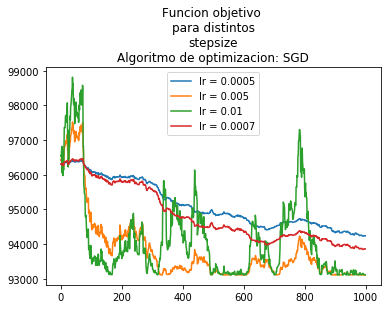

In [21]:
plt.plot(performanceSGD[0][0], label='lr = 0.0005')
plt.plot(performanceSGD[1][0], label='lr = 0.005')
plt.plot(performanceSGD[2][0], label='lr = 0.01')
plt.plot(performanceSGD[3][0], label='lr = 0.0007')
plt.title('Funcion objetivo \npara distintos\nstepsize\nAlgoritmo de optimizacion: SGD')
plt.legend(loc = 'best')
plt.show()

Como podemos esperar, el comportamiento de la funcion es erratico y pareciera no disminuir de manera sistemática, esto es lo que se espera dado el comportamiento de este tipo de algoritmo:

* SGD se actualiza constantemente con una gran varianza lo que hace que la funcion objetivo fluctue. No decrese de forma monotona.
* SGD pareciera decreser y saltar a un nuevo minimo cada vez que el valor de beta se actualiza.

Esto es lo que se espera, según lo visto en clase:

![alt text](img06.png "SGD Behavior")



Sin embargo, si actualizamos el valor de beta en más epochs sobre la misma data, debe existire una clara tendencia de decresimiento en la funcion objetivo. 

### Experimento bonus: 

A continuacion, se realiza el experimento con tres epochs (es decir, iterando sobre toda la data tres veces):

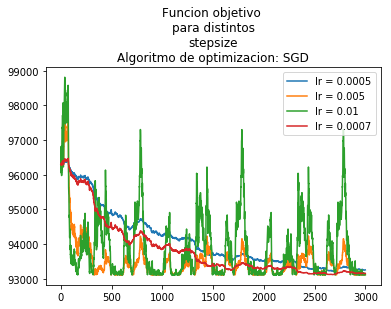

In [22]:
performanceSGD = []
for learingR in learningRates:
    performanceSGD.append(testPerformanceSGD(lr = learingR,epochs=3))
plt.plot(performanceSGD[0][0], label='lr = 0.0005')
plt.plot(performanceSGD[1][0], label='lr = 0.005')
plt.plot(performanceSGD[2][0], label='lr = 0.01')
plt.plot(performanceSGD[3][0], label='lr = 0.0007')
plt.title('Funcion objetivo \npara distintos\nstepsize\nAlgoritmo de optimizacion: SGD')
plt.legend(loc = 'best')
plt.show()

Es interesante notar que a menor step size, las fluctuaciones sobre el valor de la funcion objetivo tambien son menores.

**El step size afecta la grafica, en cuanto a la rapidez de la convergencia del algoritmo y en las fluctuaciones de la funcion objetivo, se incluyó el step size ganador de la parte dos para medir su desempeño. Al ser un stepsize mas pequeño que los demas, tarda mas en llegar a la convergencia, sin embargo, el comportamiento es menos caótico que los step size mas grandes.**

**Desde una perspectiva personal, es mejor tener estabilidad a rapida convergencia, por lo que el step size mas adecuado es el de valor 0.0007**

# Parte 4: MBGD.

In [23]:
batchSizes = [25,50, 100]
learningRates= [0.0005, 0.005, 0.01]
#Inicializando beta como un vector nulo
beta_true = np.zeros_like(beta_true)

In [24]:
def testPerformanceMBGD(beta=beta_true,X = xShuffle, Y = yShuffle, lr = learningRates[0], minBatch=25):
    '''
    input: La funcion toma como paremtros los valores el vector X, Y, el step size y los parametros entrenables beta
    output: Devuelve una tupla de tamaño 3. El primer valor es una lista con los valores de la funcion evaluada en
            cada  iteracion. El segundo valor es una lista con el error cuadrado medio (similar a la funcion objetivo)
            de cada iteracion.
    '''
    funcionObjList = []
    MSE = 0
    errorList = []
    for i in range(int(n/minBatch)):
        Y_hat = np.matmul(X,beta)
        MSE = np.mean(np.power((Y-Y_hat),2))
        beta = generalGD(lr,X[i*minBatch:(i+1)*minBatch],Y[i*minBatch:(i+1)*minBatch],beta_true)
        funcionObj = np.sum(np.power((np.matmul(X,beta) - Y),2))
        funcionObjList.append(funcionObj)
        errorList.append(MSE)
    return (funcionObjList,errorList)

In [25]:
resultBatches = []
for mb in batchSizes:
    #print('mini batch = '+str(mb))
    performanceMBGD = []
    for learingR in learningRates:
        #print('lr = '+str(learingR))
        performanceMBGD.append(testPerformanceMBGD(lr = learingR,minBatch=mb))
    resultBatches.append(performanceMBGD)

* Gráfica de los distintos learning rates para el primer mini batch de 25:

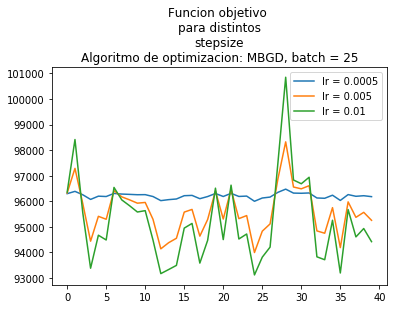

In [26]:
plt.plot(resultBatches[0][0][0], label='lr = 0.0005')
plt.plot(resultBatches[0][1][0], label='lr = 0.005')
plt.plot(resultBatches[0][2][0], label='lr = 0.01')
plt.title('Funcion objetivo \npara distintos\nstepsize\nAlgoritmo de optimizacion: MBGD, batch = 25')
plt.legend(loc = 'best')
plt.show()

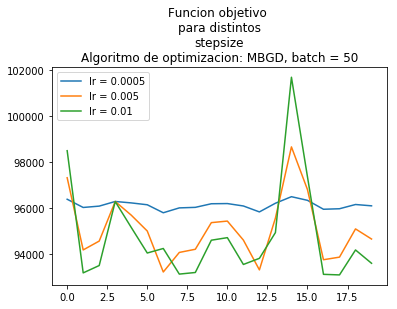

In [27]:
plt.plot(resultBatches[1][0][0], label='lr = 0.0005')
plt.plot(resultBatches[1][1][0], label='lr = 0.005')
plt.plot(resultBatches[1][2][0], label='lr = 0.01')
plt.title('Funcion objetivo \npara distintos\nstepsize\nAlgoritmo de optimizacion: MBGD, batch = 50')
plt.legend(loc = 'best')
plt.show()

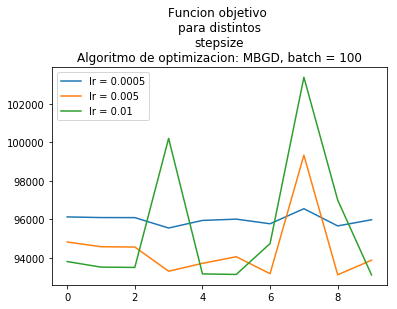

In [28]:
plt.plot(resultBatches[2][0][0], label='lr = 0.0005')
plt.plot(resultBatches[2][1][0], label='lr = 0.005')
plt.plot(resultBatches[2][2][0], label='lr = 0.01')
plt.title('Funcion objetivo \npara distintos\nstepsize\nAlgoritmo de optimizacion: MBGD, batch = 100')
plt.legend(loc = 'best')
plt.show()

**Cuando se toma una mini batch con mayor tamaño, las fluctuaciones en la función objetivo disminuyen lo cual tiene sentido dado que cuando el tamaño del mini batch tiende al tamaño del batch completo, se espera un comportamiento igual al del algoritmo de Gradient Descent convencional, de igual forma, el step size presenta el mismo comportamiento que en las anteriores partes, teniendo un comportamiento estable en pequeños valores cuando el mini batch es pequeño y alcanzando la convergencia de manera más lenta.**

El mejor resultado pareciera obtenerse con un step zise de 0.0005 y un batch igual a 100, aún cuando es es la convergencia se logra de forma mas lenta. De igual manera, este algoritmo puede correrse sobre cada mini batch las veces que se requiera (tal como el algoritmo de SGD), pudiendo alcanzar una convergencia mas precisa.

# Parte 5: Comparacion.

* Para este laboratorio dado que el tamaño de la data no es muy grande, el mejor metodo es el de la parte No. 2
* El segundo mejor método, basado en las gráficas mostradas, es el SGD con un step size de 0.0007 (el mismo step size del metodo GD puro
* Por último, el método de MBGD con un batch de 100 y un learning rate de 0.0005